In [18]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
datapath = '/work/aes/OM4_025/heat_salt_budget/'
native_vars = Dataset(datapath+'19000101.ocean_annual.nc').variables
remapped_vars = Dataset(datapath+'19000101.ocean_annual_z.nc').variables
tidx = 1 ; latidx = 817 ; lonidx = 1165

In [29]:
z_native = native_vars['thkcello'][tidx,:,latidx,lonidx].cumsum()
z_remapped = remapped_vars['z_i'][1:]

In [52]:
def plot_cum_integral(varname, native, remapped, z_native, z_remapped, tidx, latidx, lonidx):
    nvar = native[varname][tidx,:,latidx,lonidx]
    rvar = remapped[varname][tidx,:,latidx,lonidx]
    plt.plot(z_native, nvar.cumsum(), '-o', label = 'Native')
    plt.plot(z_remapped, rvar.cumsum(), '-o', label = 'Remapped')
    plt.xlim(0,1000)
    plt.xlabel('Interface Depth (m)')
    plt.ylabel('Tracer Content Tendency')
    plt.legend()
    print('%s Native integral: %e' % (varname, nvar.sum()) )
    print('%s Remapped integral: %e' % (varname, rvar.sum()) )
    print('%s Difference: %e' % (varname, nvar.sum() - rvar.sum() ))
    return

boundary_forcing_heat_tendency Native integral: -1.778320e+02
boundary_forcing_heat_tendency Remapped integral: -1.778320e+02
boundary_forcing_heat_tendency Difference: 1.525879e-05


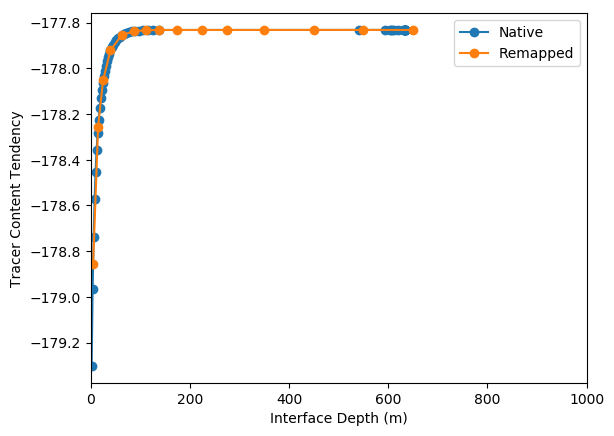

In [55]:
plot_cum_integral('boundary_forcing_heat_tendency', native_vars, remapped_vars, z_native, z_remapped, tidx, latidx, lonidx)

frazil_heat_tendency Native integral: 0.000000e+00
frazil_heat_tendency Remapped integral: 0.000000e+00
frazil_heat_tendency Difference: 0.000000e+00


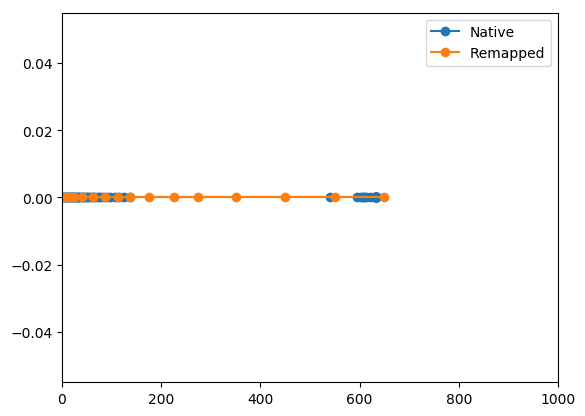

In [46]:
plot_cum_integral('frazil_heat_tendency', native_vars, remapped_vars, z_native, z_remapped, tidx, latidx, lonidx)

T_advection_xy Native integral: 2.876534e+02
T_advection_xy Remapped integral: 2.876562e+02
T_advection_xy Difference: -2.807617e-03


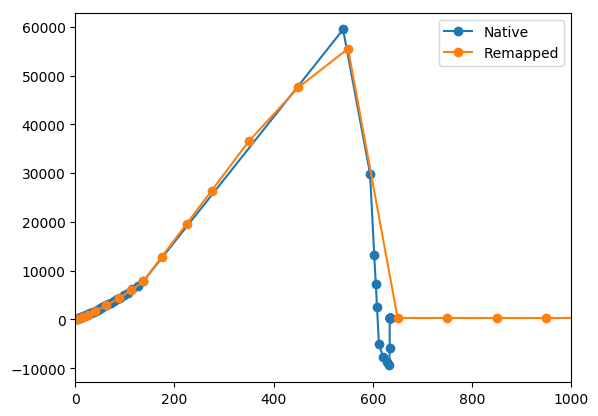

In [47]:
plot_cum_integral('T_advection_xy', native_vars, remapped_vars, z_native, z_remapped, tidx, latidx, lonidx)

opottempdiff Native integral: 1.344168e-04
opottempdiff Remapped integral: 0.000000e+00
opottempdiff Difference: 1.344168e-04


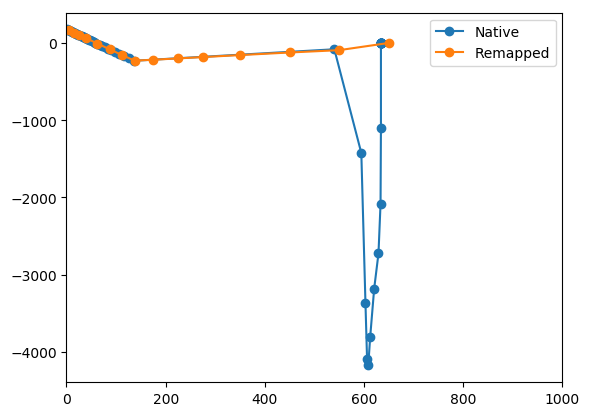

In [48]:
jtplot.reset()
plot_cum_integral('opottempdiff', native_vars, remapped_vars, z_native, z_remapped, tidx, latidx, lonidx)

opottemptend Native integral: 1.098923e+02
opottemptend Remapped integral: 1.098867e+02
opottemptend Difference: 5.584717e-03


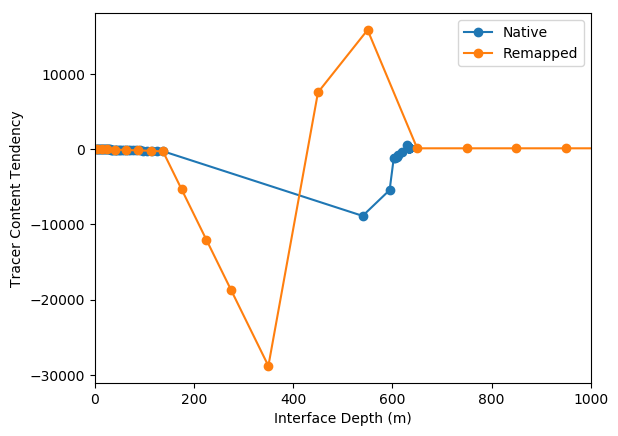

In [53]:
jtplot.reset()
plot_cum_integral('opottemptend', native_vars, remapped_vars, z_native, z_remapped, tidx, latidx, lonidx)

osalttend Native integral: -2.057520e-04
osalttend Remapped integral: -2.057552e-04
osalttend Difference: 3.245077e-09


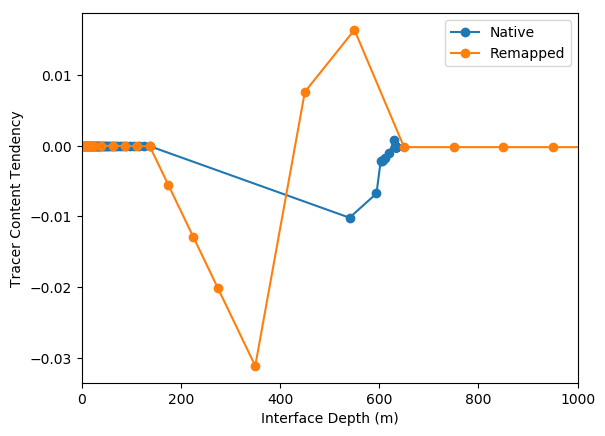

In [54]:
jtplot.reset()
plot_cum_integral('osalttend', native_vars, remapped_vars, z_native, z_remapped, tidx, latidx, lonidx)

Th_tendency_vert_remap Native integral: 1.227526e-03
Th_tendency_vert_remap Remapped integral: 0.000000e+00
Th_tendency_vert_remap Difference: 1.227526e-03


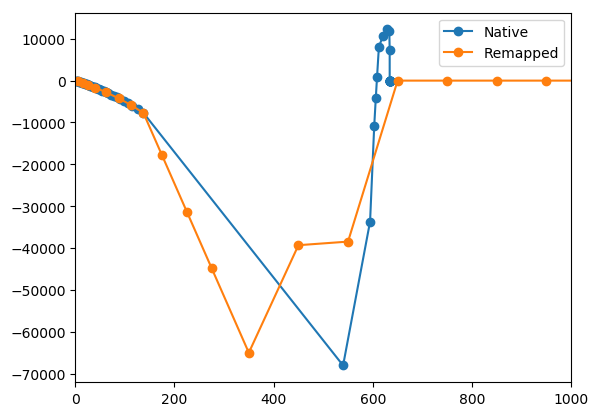

In [50]:
plot_cum_integral('Th_tendency_vert_remap', native_vars, remapped_vars, z_native, z_remapped, tidx, latidx, lonidx)